In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
fromage = pd.read_csv("http://www.math.u-bordeaux.fr/~mchave100p/wordpress/wp-content/uploads/2013/10/fromage.txt",sep="\t",header=0,index_col=0)

In [2]:
fromage


calories  sodium  calcium  lipides  retinol  folates  \
Fromages                                                                   
CarredelEst              314   353.5     72.6     26.3     51.6     30.3   
Babybel                  314   238.0    209.8     25.1     63.7      6.4   
Beaufort                 401   112.0    259.4     33.3     54.9      1.2   
Bleu                     342   336.0    211.1     28.9     37.1     27.5   
Camembert                264   314.0    215.9     19.5    103.0     36.4   
Cantal                   367   256.0    264.0     28.8     48.8      5.7   
Chabichou                344   192.0     87.2     27.9     90.1     36.3   
Chaource                 292   276.0    132.9     25.4    116.4     32.5   
Cheddar                  406   172.0    182.3     32.5     76.4      4.9   
Comte                    399    92.0    220.5     32.4     55.9      1.3   
Coulomniers              308   222.0     79.2     25.6     63.6     21.1   
Edam                     327   148.0    272.2     24.7     65.7      5.5   
Emmental                 378    60.0    308.2     29.4     56.3      2.4   
Fr.chevrepatemolle       206   160.0     72.8     18.5    150.5     31.0   
Fr.fondu.45              292   390.0    168.5     24.0     77.4      5.5   
Fr.frais20nat.            80    41.0    146.3      3.5     50.0     20.0   
Fr.frais40nat.           115    25.0     94.8      7.8     64.3     22.6   
Maroilles                338   311.0    236.7     29.1     46.7      3.6   
Morbier                  347   285.0    219.0     29.5     57.6      5.8   
Parmesan                 381   240.0    334.6     27.5     90.0      5.2   
Petitsuisse40            142    22.0     78.2     10.4     63.4     20.4   
PontlEveque              300   223.0    156.7     23.4     53.0      4.0   
Pyrenees                 355   232.0    178.9     28.0     51.5      6.8   
Reblochon                309   272.0    202.3     24.6     73.1      8.1   
Rocquefort               370   432.0    162.0     31.2     83.5     13.3   
SaintPaulin              298   205.0    261.0     23.3     60.4      6.7   
Tome                     321   252.0    125.5     27.3     62.3      6.2   
Vacherin                 321   140.0    218.0     29.3     49.2      3.7   
Yaourtlaitent.nat.        70    91.0    215.7      3.4     42.9      2.9   

                    proteines  cholesterol  magnesium  
Fromages                                               
CarredelEst              21.0           70         20  
Babybel                  22.6           70         27  
Beaufort                 26.6          120         41  
Bleu                     20.2           90         27  
Camembert                23.4           60         20  
Cantal                   23.0           90         30  
Chabichou                19.5           80         36  
Chaource                 17.8           70         25  
Cheddar                  26.0          110         28  
Comte                    29.2          120         51  
Coulomniers              20.5           80         13  
Edam                     24.7           80         44  
Emmental                 29.4          110         45  
Fr.chevrepatemolle       11.1           50         16  
Fr.fondu.45              16.8           70         20  
Fr.frais20nat.            8.3           10         11  
Fr.frais40nat.            7.0           30         10  
Maroilles                20.4           90         40  
Morbier                  23.6           80         30  
Parmesan                 35.7           80         46  
Petitsuisse40             9.4           20         10  
PontlEveque              21.1           70         22  
Pyrenees                 22.4           90         25  
Reblochon                19.7           80         30  
Rocquefort               18.7          100         25  
SaintPaulin              23.3           70         26  
Tome                     21.8           80         20  
Vacherin                 17.6          

In [3]:
# on centre et on réduit

import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fromage_cr = sc.fit_transform(fromage.values)

In [4]:
#dimension des données

print(fromage.shape)

#statistiques descriptives

print(fromage.describe())




(29, 9)
         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80

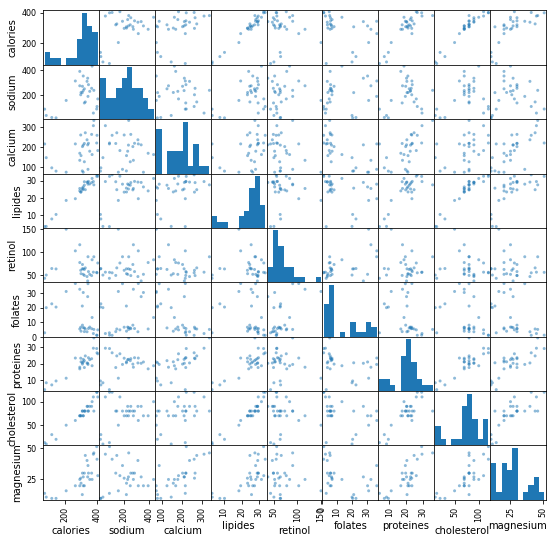

In [5]:
#graphique - croisement deux à deux des variables

scatt_mat = scatter_matrix(fromage,figsize=(9,9))[-1]

## CAH

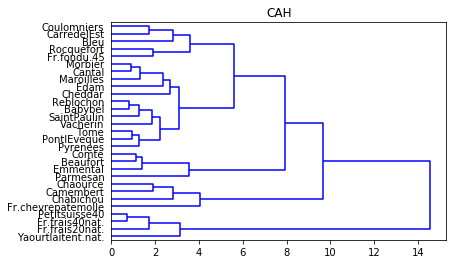

In [6]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(fromage_cr,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=fromage.index,orientation='right',color_threshold=0)
plt.show()

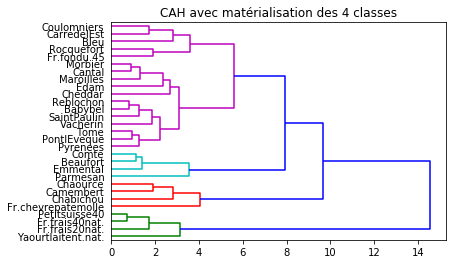

In [7]:
#matérialisation des 4 classes (hauteur t = 7)

plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='right',color_threshold=7)
plt.show()



In [8]:
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus

groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)


[4 4 3 4 2 4 2 2 4 3 4 4 3 2 4 1 1 4 4 3 1 4 4 4 4 4 4 4 1]


In [9]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(fromage.index[idg],groupes_cah[idg]))


             Fromages
1  Yaourtlaitent.nat.
1      Fr.frais20nat.
1       Petitsuisse40
1      Fr.frais40nat.
2  Fr.chevrepatemolle
2           Camembert
2           Chabichou
2            Chaource
3            Emmental
3            Parmesan
3            Beaufort
3               Comte
4            Pyrenees
4         PontlEveque
4          Rocquefort
4         SaintPaulin
4                Tome
4           Reblochon
4         CarredelEst
4           Maroilles
4            Vacherin
4                Edam
4         Coulomniers
4             Cheddar
4              Cantal
4                Bleu
4             Babybel
4             Morbier
4         Fr.fondu.45


Le 1er groupe est constitué de fromages frais.  
Le 2nd de fromages à pâte molle.  
Le 3ème de fromages durs.  
Le 4ème est un peu fourre-tout.  


## K-means

In [10]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 avec l'étude du dessus
kmeans.fit(fromage_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))



[0 3 1 3 0 3 0 0 3 1 0 1 1 0 3 2 2 3 3 1 2 3 3 3 3 3 3 3 2]
             Fromages
0         CarredelEst
0           Camembert
0           Chabichou
0            Chaource
0         Coulomniers
0  Fr.chevrepatemolle
1            Beaufort
1            Parmesan
1               Comte
1                Edam
1            Emmental
2       Petitsuisse40
2      Fr.frais40nat.
2      Fr.frais20nat.
2  Yaourtlaitent.nat.
3             Cheddar
3              Cantal
3           Maroilles
3             Morbier
3                Bleu
3             Babybel
3         PontlEveque
3            Pyrenees
3           Reblochon
3          Rocquefort
3         SaintPaulin
3                Tome
3            Vacherin
3         Fr.fondu.45


In [11]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(fromage_cr),index = fromage.index)
print(dist_data)

                           0         1         2         3
Fromages                                                  
CarredelEst         2.223661  5.216997  5.525639  2.919238
Babybel             3.017874  2.793381  5.190152  0.743747
Beaufort            5.161412  1.145392  7.505349  2.855400
Bleu                3.236961  3.900395  6.124589  2.105363
Camembert           1.933430  5.102763  5.403772  3.542924
Cantal              4.024862  2.200693  6.296011  1.193917
Chabichou           1.778697  4.530170  5.925956  3.387208
Chaource            1.032372  5.090642  5.554870  3.458020
Cheddar             3.748034  2.291313  6.824554  1.953053
Comte               5.442474  1.352273  7.842530  3.420311
Coulomniers         1.957956  4.749377  4.842860  2.489154
Edam                4.229224  1.344287  6.125677  2.254039
Emmental            5.526302  0.902128  7.477880  3.396041
Fr.chevrepatemolle  3.097303  7.093877  5.010448  5.542923
Fr.fondu.45         2.837017  4.449245  5.282331  1.8874

In [12]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0  0  1  2   3
row_0             
1      0  0  4   0
2      4  0  0   0
3      0  4  0   0
4      2  1  0  14

Il y bien correspondances entre les groupes proposés par la CAH et la méthode des K-means.
Les deux groupes 1 sont identiques, et il y a de fortes correspondances dans les autres.

[0.48626255 0.36025261 0.34540073 0.32602083 0.27856806 0.23971168
 0.27865064 0.2505819  0.29569363 0.21780446 0.19915052 0.21503562
 0.21359279 0.17932771 0.18706456]


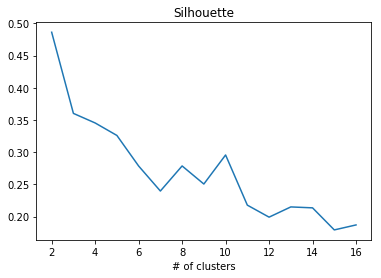

In [13]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage_cr)
    res[k] = metrics.silhouette_score(fromage_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

le nombre de groupes le plus adapté au sens de la metric "silhouette" est 2.

In [ ]:
#utilisation de la métrique "calinski_harabaz_score"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage_cr)
    res[k] = metrics.calinski_harabaz_score(fromage_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("calinski_harabaz_score")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

le nombre de groupe le plus adapté au sens de la metric "calinski_harabaz_score" est 4.

D'autres metrics....  ('https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics')

## interprétation des classes


In [ ]:
#moyenne par variable

m = fromage.mean()

#TSS

TSS = fromage.shape[0]*fromage.var(ddof=0)
print(TSS)


In [ ]:
#data.frame conditionnellement aux groupes

gb = fromage.groupby(kmeans.labels_)

#effectifs conditionnels

nk = gb.size()
print(nk)


In [ ]:
#moyennes conditionnelles

mk = gb.mean()
print(mk)

#pour chaque groupe écart à la moyenne par variable

EMk = (mk-m)**2

#pondéré par les effectifs du groupe

EM = EMk.multiply(nk,axis=0)


In [ ]:
#somme des valeurs => BSS

BSS = np.sum(EM,axis=0)
print(BSS)


In [ ]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes pour chaque variable

R2 = BSS/TSS
print(R2)

In [ ]:
#ACP

from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(fromage_cr)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

#### problème:
le groupe 1 ici en bleu, écrase les autres données en la tassant dans une partie du graphe.  
Il convient donc d'exclure ces données et de recommencer l'ACP dans un autre plan que ce plan factoriel.

In [ ]:
#retirer des observations le groupe n°1 du k-means précédent
fromage_subset = fromage.iloc[kmeans.labels_!=1,:]

print(fromage_subset.shape)
print(fromage_subset)

In [ ]:
#centrer et réduire
fromage_subset_cr = sc.fit_transform(fromage_subset.values)
print(fromage_subset_cr)

In [ ]:
#générer la matrice des liens

Z_subset = linkage(fromage_subset_cr,method='ward',metric='euclidean')

#cah et affichage du dendrogramme

plt.title("CAH")
dendrogram(Z_subset,labels=fromage_subset.index,orientation='left',color_threshold=7)
plt.show()

#groupes

groupes_subset_cah = fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)

In [ ]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(fromage_subset_cr)
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
#remarquer le rôle de zip()
plt.figure(figsize=(10,10))
for couleur,k in zip(['lawngreen','red','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
#mettre les labels des points
#remarquer le rôle de enumerate()
for i,label in enumerate(fromage_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show()

Quelques fromages ont changé de camp...

## Exercice:

Sur le jeu de données suivant: 
    * extraire les données sur les dimensions des pétales
    * effectuer une CAH
    * utilisiser la méthode K-Means
    * Comparer les méthode
    * peut-on dire que la classification est bonne comparée au numéro de l'espèce donné?
    * effectuer une ACP
    * doit-on recommencer en excluant un groupe?


In [3]:
df = pd.read_excel('../data/Iris.xls')   # attention au chemin!!!!!
df

Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length  \
0             1          0.2           1.4          3.5           5.1   
1             1          0.2           1.4          3.0           4.9   
2             1          0.2           1.3          3.2           4.7   
3             1          0.2           1.5          3.1           4.6   
4             1          0.2           1.4          3.6           5.0   
5             1          0.4           1.7          3.9           5.4   
6             1          0.3           1.4          3.4           4.6   
7             1          0.2           1.5          3.4           5.0   
8             1          0.2           1.4          2.9           4.4   
9             1          0.1           1.5          3.1           4.9   
10            1          0.2           1.5          3.7           5.4   
11            1          0.2           1.6          3.4           4.8   
12            1          0.1           1.4          3.0           4.8   
13            1          0.1           1.1          3.0           4.3   
14            1          0.2           1.2          4.0           5.8   
15            1          0.4           1.5          4.4           5.7   
16            1          0.4           1.3          3.9           5.4   
17            1          0.3           1.4          3.5           5.1   
18            1          0.3           1.7          3.8           5.7   
19            1          0.3           1.5          3.8           5.1   
20            1          0.2           1.7          3.4           5.4   
21            1          0.4           1.5          3.7           5.1   
22            1          0.2           1.0          3.6           4.6   
23            1          0.5           1.7          3.3           5.1   
24            1          0.2           1.9          3.4           4.8   
25            1          0.2           1.6          3.0           5.0   
26            1          0.4           1.6          3.4           5.0   
27            1          0.2           1.5          3.5           5.2   
28            1          0.2           1.4          3.4           5.2   
29            1          0.2           1.6          3.2           4.7   
..          ...          ...           ...          ...           ...   
120           3          2.3           5.7          3.2           6.9   
121           3          2.0           4.9          2.8           5.6   
122           3          2.0           6.7          2.8           7.7   
123           3          1.8           4.9          2.7           6.3   
124           3          2.1           5.7          3.3           6.7   
125           3          1.8           6.0          3.2           7.2   
126           3          1.8           4.8          2.8           6.2   
127           3          1.8           4.9          3.0           6.1   
128           3          2.1           5.6          2.8           6.4   
129           3          1.6           5.8          3.0           7.2   
130           3          1.9           6.1          2.8           7.4   
131           3          2.0           6.4          3.8           7.9   
132           3          2.2           5.6          2.8           6.4   
133           3          1.5           5.1          2.8           6.3   
134           3          1.4           5.6          2.6           6.1   
135           3          2.3           6.1          3.0           7.7   
136           3          2.4           5.6          3.4           6.3   
137           3          1.8           5.5          3.1           6.4   
138           3          1.8           4.8          3.0           6.0   
139           3          2.1           5.4          3.1           6.9   
140           3          2.4           5.6          3.1           6.7   
141           3          2.3           5.1          3.1           6.9   
142           3          1.9           5.1          2.7        

In [4]:
x=df.iloc[:,1:5]

In [5]:
x.head(2)

Petal_width  Petal_length  Sepal_width  Sepal_length
0          0.2           1.4          3.5           5.1
1          0.2           1.4          3.0           4.9

In [6]:
# on centre et on réduit

import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_cr = sc.fit_transform(x.values)

In [7]:
#dimension des données

print(x.shape)

#statistiques descriptives

print(x.describe())

(150, 4)
       Petal_width  Petal_length  Sepal_width  Sepal_length
count   150.000000    150.000000   150.000000    150.000000
mean      1.199333      3.758000     3.057333      5.843333
std       0.762238      1.765298     0.435866      0.828066
min       0.100000      1.000000     2.000000      4.300000
25%       0.300000      1.600000     2.800000      5.100000
50%       1.300000      4.350000     3.000000      5.800000
75%       1.800000      5.100000     3.300000      6.400000
max       2.500000      6.900000     4.400000      7.900000


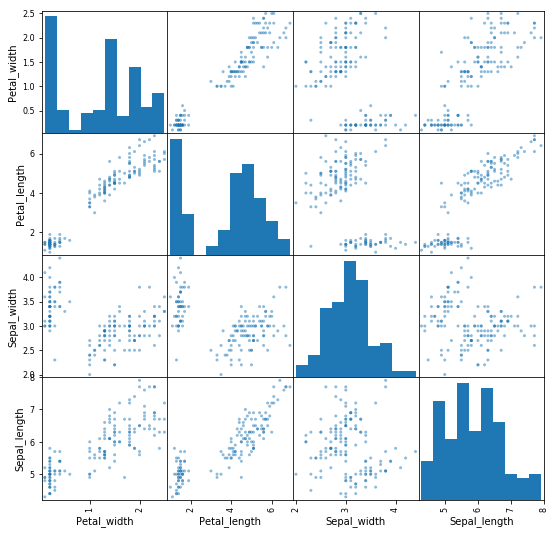

In [8]:
#graphique - croisement deux à deux des variables

scatt_mat = scatter_matrix(x,figsize=(9,9))[-1]

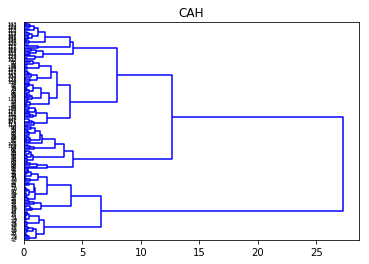

In [9]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(x_cr,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=x.index,orientation='right',color_threshold=0)
plt.show()

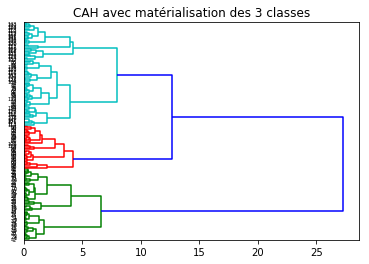

In [25]:
#matérialisation des 3 classes (hauteur t = 10)

plt.title('CAH avec matérialisation des 3 classes')
dendrogram(Z,labels=x.index,orientation='right',color_threshold=10)
plt.show()

In [29]:
#découpage à la hauteur t = 10 ==> identifiants de 3 groupes obtenus

groupes_cah = fcluster(Z,t=10,criterion='distance')
print(groupes_cah)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 2 3 2 3 2 2 3 2 3 2 3 2 2 2 2 3 3 3 3
 3 3 3 3 3 2 2 2 2 3 2 3 3 2 2 2 2 3 2 2 2 2 2 3 2 2 3 3 3 3 3 3 2 3 3 3 3
 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [30]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(x.index[idg],groupes_cah[idg]))

      0
1     0
1    27
1    28
1    29
1    30
1    31
1    32
1    33
1    34
1    35
1    36
1    37
1    38
1    39
1    40
1    42
1    43
1    45
1    46
1    47
1    48
1    49
1    26
1    25
1    44
1    23
1    24
1     1
1     2
1     3
..  ...
3    65
3    75
3    63
3    58
3    56
3    54
3    52
3    51
3    50
3    61
3    76
3    77
3    78
3   110
3   109
3   108
3   107
3   105
3   104
3   103
3   102
3   101
3   100
3    97
3    91
3    86
3    85
3    83
3   112
3   149

[150 rows x 1 columns]


In [31]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3)  # on choisit 3 avec l'étude du dessus
kmeans.fit(x_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(x.index[idk],kmeans.labels_[idk]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
      0
0   147
0    75
0   148
0   130
0   131
0   132
0    70
0   135
0   136
0    65
0   137
0   139
0   140
0   141
0   143
0   144
0    56
0   145
0   108
0    52
0    76
0    77
0   129
0   128
0   105
0   104
0   103
0   102
0   109
0   100
..  ...
2    60
2    59
2    58
2    57
2    55
2    54
2    53
2    73
2   106
2    78
2    80
2    99
2    98
2    97
2    96
2    95
2    94
2    93
2    92
2    91
2    90
2    89
2    88
2    87
2    84
2    83
2    82
2    81
2    79
2   149

[150 rows x 1 columns]


In [32]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(x_cr),index = x.index)
print(dist_data)

            0         1         2
0    3.989406  0.212958  3.121198
1    4.017933  0.996045  2.675508
2    4.193437  0.651984  2.974167
3    4.197847  0.903456  2.880144
4    4.111572  0.402155  3.300226
5    3.898931  1.211548  3.505544
6    4.216380  0.502449  3.148564
7    3.973134  0.091325  2.991848
8    4.407572  1.421747  2.925159
9    4.057643  0.789931  2.793990
10   3.920881  0.789994  3.321253
11   4.078536  0.276181  3.049363
12   4.164404  1.034979  2.806350
13   4.630697  1.334825  3.212210
14   4.146193  1.638656  3.888350
15   4.495475  2.398988  4.499830
16   4.029661  1.207488  3.609780
17   3.913885  0.216188  3.055942
18   3.725620  1.209867  3.344940
19   4.101019  0.867062  3.500654
20   3.663837  0.504016  2.808257
21   3.944967  0.668264  3.278008
22   4.510613  0.686581  3.589909
23   3.579964  0.479456  2.559347
24   3.988174  0.363454  2.964932
25   3.884319  0.990239  2.556827
26   3.790888  0.226831  2.827972
27   3.895399  0.294719  3.059708
28   3.880856 

In [33]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1   2
row_0            
1       0  49   0
2       0   1  29
3      47   0  24

[0.58175005 0.46304204 0.38694104 0.3471606  0.34413101 0.33577144
 0.34586818 0.35333938 0.34393016 0.3601603  0.35157025 0.35066784
 0.32578402 0.34288629 0.34605048]


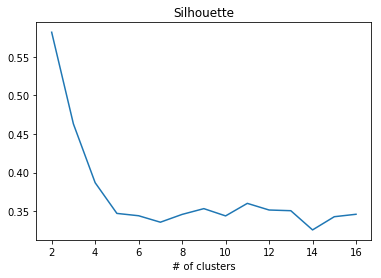

In [34]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(x_cr)
    res[k] = metrics.silhouette_score(x_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

[251.34933946 241.9044017  207.26660627 202.95152532 185.20842035
 177.43958447 172.5889825  175.35642386 181.96283073 179.8788147
 178.29339231 166.6059781  170.34333514 162.95801116 170.17163193]


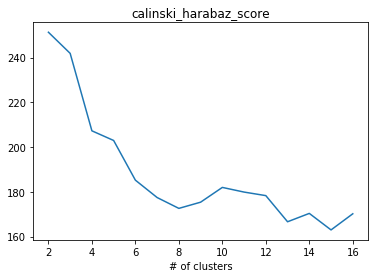

In [35]:
#utilisation de la métrique "calinski_harabaz_score"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(x_cr)
    res[k] = metrics.calinski_harabaz_score(x_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("calinski_harabaz_score")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()

In [36]:
#moyenne par variable

m = x.mean()

#TSS

TSS = x.shape[0]*x.var(ddof=0)
print(TSS)

Petal_width      86.569933
Petal_length    464.325400
Sepal_width      28.306933
Sepal_length    102.168333
dtype: float64


In [37]:
#data.frame conditionnellement aux groupes

gb = x.groupby(kmeans.labels_)

#effectifs conditionnels

nk = gb.size()
print(nk)


0    47
1    50
2    53
dtype: int64


In [38]:
#moyennes conditionnelles

mk = gb.mean()
print(mk)

#pour chaque groupe écart à la moyenne par variable

EMk = (mk-m)**2

#pondéré par les effectifs du groupe

EM = EMk.multiply(nk,axis=0)


   Petal_width  Petal_length  Sepal_width  Sepal_length
0     1.972340      5.510638     3.095745      6.780851
1     0.246000      1.462000     3.428000      5.006000
2     1.413208      4.369811     2.673585      5.801887


In [39]:
#somme des valeurs => BSS

BSS = np.sum(EM,axis=0)
print(BSS)


Petal_width      75.950936
Petal_length    427.791221
Sepal_width      14.743966
Sepal_length     76.457556
dtype: float64


In [40]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes pour chaque variable

R2 = BSS/TSS
print(R2)

Petal_width     0.877336
Petal_length    0.921318
Sepal_width     0.520861
Sepal_length    0.748349
dtype: float64


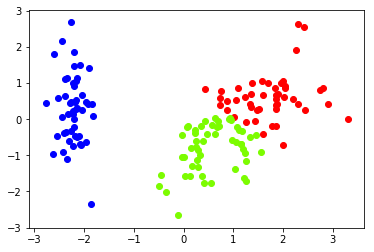

In [41]:
#ACP

from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(x_cr)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()